<a href="https://colab.research.google.com/github/Dominika26/machine-learning-bootcamp/blob/main/SVM_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maszyna wektorów nośnych (Support Vector Machine)**

*   Klasyfikacja liniowa i nieliniowa
*   Model stra się znaleźć jak najszerszy pas między dwoma klasami 
* algorytm jest wrażliwy na dane odstające 
* hard margin- wyznaczam taką granicę, że wszystkie są dobrze sklasyfikowane 
* soft margin- wyznaczam taką granicę, że niektóre mogą być dane błędnie sklasyfikowane, mogą być na tym pasie, dopuszcza naruszenie granic naszego pasa, kontrolujemy to poprzez parametr c, najczęściej wybieramy 1 
* możemy zmieniać kernel, czyli że rodzielone będą cechy np. liniowo, lub rbf związane z rozkładmem normalnym, albo też wilomianowe (domyśle rbf
* możemy przekształcać dane, które normalnie nie byłyby możliwe do rodzielenia liniowo. Np. możemy spróbować rozdzielić problem 1D na 2D albo 2D na 3D 




In [19]:
!pip install scikit-learn

In [20]:
!pip install --upgrade scikit-learn 

Import bibliotek

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(font_scale=1.3)
np.random.seed(42)

Wygenerowanie danych 

In [22]:
from sklearn.datasets import load_iris
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
#ograniczamy teraz dane tylko do dwóch klas 
# df = df[(df['target']==0.0) | (df['target'] == 1.0)] 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [23]:
# wycinamy tylko kolumny 2, 1
data = df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]



Podział na zbiór treningowy i testowy 

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data, target)

Standaryzacja cech 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Klasyfikator SVM- linear

In [26]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
classifier.score(X_test, y_test)
# dokładność modelu sprawdzamy jak model działa na danych testowych. Model dopasował się 
# w 100%

0.9736842105263158

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


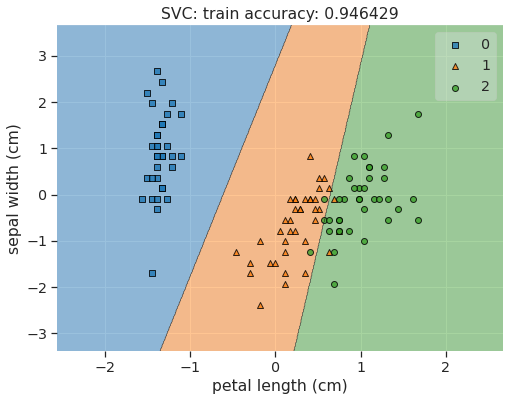

In [28]:
# wyznaczamy granice decyzyjne
from mlxtend.plotting import plot_decision_regions 

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):4f}') # czyli mam tutaj 100 drzew decyzyjnych 
plt.show()

Działanie modelu na zbiorze testowym 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


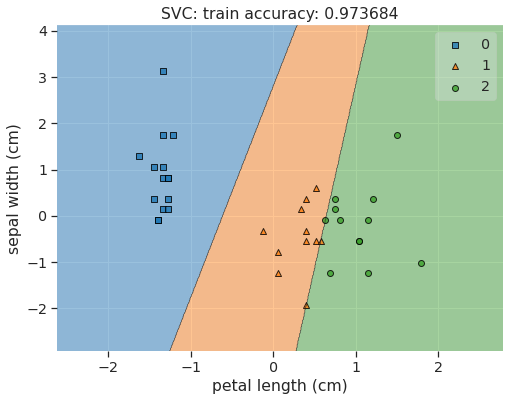

In [29]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_test, y_test):4f}') # czyli mam tutaj 100 drzew decyzyjnych 
plt.show()
# danych jest mało, więc ciężko tutaj o błąd, jak będę miała więcej danych to wyniki będą 
#bardziej miarodajne 

**Klasyfikator SVM -rbf** (czyli podział oparty na rozkładzie normalnym)

In [30]:
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9736842105263158

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


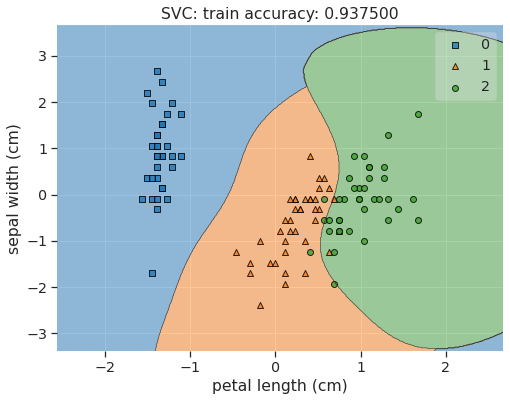

In [31]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):4f}') # czyli mam tutaj 100 drzew decyzyjnych 
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


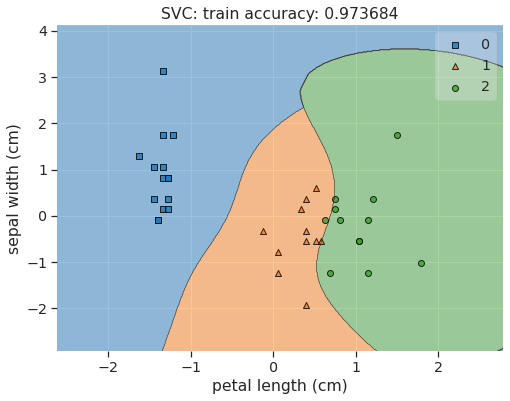

In [32]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_test, y_test):4f}') # czyli mam tutaj 100 drzew decyzyjnych 
plt.show()
# danych jest mało, więc ciężko tutaj o błąd, dlatego dokładność jest wyższa na zbiorze testowym